## This Time series analysis is carried out to predict Avg. Temperature change of country Åland, which is an autonomous region of Finland.

## 1.Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline



**1.1 Creating Dataframe with Avg. Temeperature datapoints for Aland**

In [3]:
df=pd.read_csv('GlobalTemperaturesdata.csv',parse_dates=["dt"],index_col="dt")

In [4]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


## 2.Data cleaning and Visualization

**2.1 Removing null values from dataset and resampling the data to Annual interval**

In [5]:
df.dropna(inplace=True)

In [6]:
newdf=df.resample('A').mean()

In [7]:
newdf.dropna(inplace=True)

**2.2 Observing the data for outliers and removing them using Zscore value**

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., 10.,
        21., 37., 63., 52., 45., 23., 13.]),
 array([-3.8965    , -3.32495833, -2.75341667, -2.181875  , -1.61033333,
        -1.03879167, -0.46725   ,  0.10429167,  0.67583333,  1.247375  ,
         1.81891667,  2.39045833,  2.962     ,  3.53354167,  4.10508333,
         4.676625  ,  5.24816667,  5.81970833,  6.39125   ,  6.96279167,
         7.53433333]),
 <BarContainer object of 20 artists>)

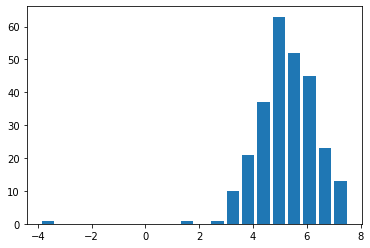

In [8]:
plt.hist(newdf.AverageTemperature, bins=20, rwidth=0.8)

In [9]:
newdf.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,267.000000,267.000000
mean,5.261835,1.726378
std,1.137933,1.669209
min,-3.896500,0.307000
25%,4.643125,0.472833
50%,5.236333,0.776417
75%,5.963625,2.835125
max,7.534333,6.930417


In [10]:
newdf['Zscore']=(newdf.AverageTemperature - newdf.AverageTemperature.mean())/newdf.AverageTemperature.std()

In [11]:
newdf.head()

,AverageTemperature,AverageTemperatureUncertainty,Zscore
dt,,,
1743-12-31,4.384000,2.294000,-0.771429
1744-12-31,6.698500,1.987625,1.262522
1745-12-31,-3.896500,1.396500,-8.048218
1750-12-31,6.293273,1.904909,0.906414
1751-12-31,5.397375,1.462875,0.119111


**2.3 Creating new dataframe by removing outliers having standard deviation more than 2**

In [12]:
df2=newdf[(newdf.Zscore>-2)&(newdf.Zscore<2)]

(array([ 3.,  7.,  6.,  8.,  9., 12., 20., 25., 25., 19., 18., 23., 24.,
        14., 16.,  8., 12.,  5.,  8.,  2.]),
 array([3.11608333, 3.33699583, 3.55790833, 3.77882083, 3.99973333,
        4.22064583, 4.44155833, 4.66247083, 4.88338333, 5.10429583,
        5.32520833, 5.54612083, 5.76703333, 5.98794583, 6.20885833,
        6.42977083, 6.65068333, 6.87159583, 7.09250833, 7.31342083,
        7.53433333]),
 <BarContainer object of 20 artists>)

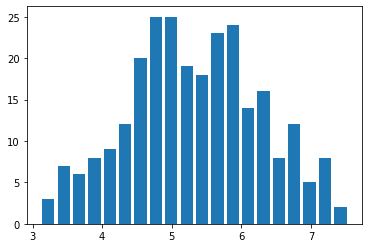

In [13]:
plt.hist(df2.AverageTemperature,bins=20,rwidth=0.8)

**2.4 Visualizing the dataset to observe the trend or any seasonal pattern**

c:\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='dt'>

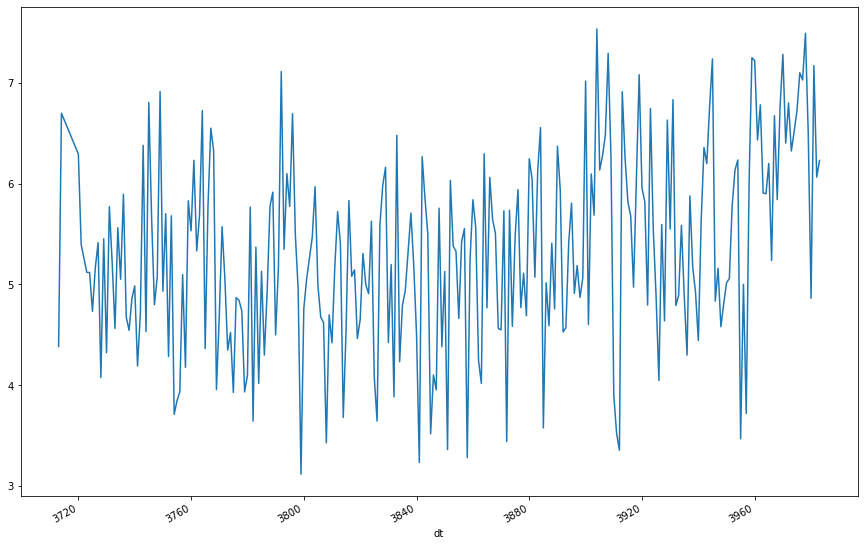

In [14]:
df2.AverageTemperature.plot(figsize=(15,10))

**2.5 Checking the stationarity of dataset by using augmented dickey-fuller test**

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adfuller_test(AverageTemperature):
    result=adfuller(AverageTemperature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(df2['AverageTemperature'])

ADF Test Statistic : -5.6088115839892945
p-value : 1.2167494879164606e-06
#Lags Used : 3
Number of Observations Used : 260
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


**From the test result it is clear that data is stationary**

## 3.Feature Engineering

In [18]:
df2.head()

,AverageTemperature,AverageTemperatureUncertainty,Zscore
dt,,,
1743-12-31,4.384000,2.294000,-0.771429
1744-12-31,6.698500,1.987625,1.262522
1750-12-31,6.293273,1.904909,0.906414
1751-12-31,5.397375,1.462875,0.119111
1753-12-31,5.118333,4.661167,-0.126107


**3.1 Taking the rolling mean with window of 3,7 and 9** 

In [19]:
m3=df2['AverageTemperature'].rolling(window=3).mean();
m7=df2['AverageTemperature'].rolling(window=7).mean();
m9=df2['AverageTemperature'].rolling(window=9).mean();

df2['m_3']= m3
df2['m_7']= m7
df2['m_9']= m9




c:\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

**3.2 Adding the first and Second lag to dataset to reduce the noise**

In [20]:
df2['lag_1']=df2['AverageTemperature'].shift(1)
df2['lag_2']=df2['AverageTemperature'].shift(2)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**3.3 Adding the Year of each datapoint to dataset**

In [21]:
df2['Year']= df2.index.year

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df2.head()

,AverageTemperature,AverageTemperatureUncertainty,Zscore,m_3,m_7,m_9,lag_1,lag_2,Year
dt,,,,,,,,,
1743-12-31,4.384000,2.294000,-0.771429,NaN,NaN,NaN,NaN,NaN,1743
1744-12-31,6.698500,1.987625,1.262522,NaN,NaN,NaN,4.384000,NaN,1744
1750-12-31,6.293273,1.904909,0.906414,5.791924,NaN,NaN,6.698500,4.384000,1750
1751-12-31,5.397375,1.462875,0.119111,6.129716,NaN,NaN,6.293273,6.698500,1751
1753-12-31,5.118333,4.661167,-0.126107,5.602994,NaN,NaN,5.397375,6.293273,1753


**3.4 Removing the null values from the dataset**

In [23]:
df2.drop(['AverageTemperatureUncertainty','Zscore'],axis=1,inplace=True)

c:\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df2.dropna(inplace=True)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df2.index = range(len(df2))

**3.5 Final Dataset for fitting the model**

In [26]:
df2.head()

,AverageTemperature,m_3,m_7,m_9,lag_1,lag_2,Year
0,5.413833,5.102389,5.319176,5.368526,5.160500,4.732833,1757
1,4.074833,4.883056,5.002256,5.334174,5.413833,5.160500,1758
2,5.452083,4.980250,5.010071,5.195683,4.074833,5.413833,1759
3,4.322000,4.616306,4.896310,4.976653,5.452083,4.074833,1760
4,5.771583,5.181889,4.989667,5.018231,4.322000,5.452083,1761


## 4. Model training

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()


**4.1 Splitting the dataset into training and testing dataset using Sklearn train_test_split method**

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
X = df2[['m_3','m_9','lag_1','lag_2','Year']]
y=df2.AverageTemperature

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**4.2 fitting the linear regression model**

In [32]:
model.fit(X_train,y_train)

LinearRegression()

## 5.Prediction and Evaluation

**5.1 Predicting the values with test dataset**

In [33]:
y_predict= model.predict(X_test)

In [34]:
y_predict

array([5.18725   , 4.7555    , 6.69416667, 5.90675   , 4.64866667,
       5.00008333, 5.3695    , 5.41275   , 7.01775   , 6.13483333,
       6.9125    , 4.01691667, 5.53158333, 6.35833333, 5.72233333,
       5.67908333, 7.28333333, 3.92741667, 6.22975   , 3.51841667,
       5.77158333, 7.029     , 5.82891667, 5.17283333, 4.29833333,
       4.83291667, 6.329     , 4.54458333, 7.10058333, 5.19716667,
       4.6205    , 6.13408333, 3.43908333, 4.79358333, 3.51641667,
       3.35925   , 6.2315    , 7.08108333, 4.56941667, 5.05775   ,
       6.72508333, 5.568     , 4.70491667, 4.85808333, 5.83125   ,
       4.90775   , 4.50391667, 4.17633333, 5.05108333, 5.33191667,
       4.56225   , 3.64275   , 4.93583333, 6.19808333, 5.82058333,
       5.78008333, 7.24941667, 6.74691667, 4.795     , 3.46716667,
       5.08      , 6.27733333, 6.23475   , 4.88025   , 4.9935    ,
       4.28375   , 4.38041667, 6.914     , 3.95508333, 6.55616667,
       4.24408333, 4.84208333, 5.45208333, 7.17075   , 7.112  

**5.2 Evaluating the predicted values with respect to actual values using Root Mean Squared Error**

In [36]:
from statsmodels.tools.eval_measures import rmse
error = rmse(y_test,y_predict)
print('Root Mean Squared Error ',error)

Root Mean Squared Error  4.150527445951792e-15


**From the test it is clear that error is very less**

In [37]:
db=pd.DataFrame(data=y_test)

In [38]:
db.index= range(len(db))

In [39]:
db['Predicted_value']=y_predict

In [40]:
db.head()

,AverageTemperature,Predicted_value
0,5.187250,5.187250
1,4.755500,4.755500
2,6.694167,6.694167
3,5.906750,5.906750
4,4.648667,4.648667


**5.3 Visualizing Predicted data and actual data**

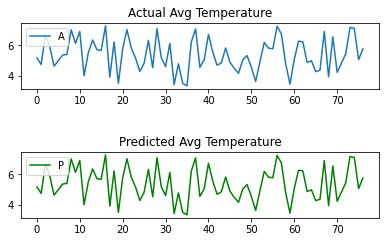

In [41]:

plt.subplot(2,1,1)
plt.plot(db.AverageTemperature)
plt.title('Actual Avg Temperature')
plt.legend('Actual')



plt.subplot(2,1,2)
plt.plot(db.Predicted_value,'g')
plt.title('Predicted Avg Temperature')
plt.legend('Predicted')

plt.tight_layout(pad=3.0)



